# Multi Layer Perceptron with Multiple Output (MNIST DataSet)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import sys

path = "DataSets\MNIST_train.csv"
test_path = "DataSets\MNIST_test.csv"

In [9]:
def preprocess(path):
    dataset = pd.read_csv(path, header=0)
    data = dataset.values
    
    x = data[:,1:] / 255.0
    y = data[:,0]
    
    lb = LabelBinarizer()
    lb.fit(y)
    y = lb.transform(y)
    
    return x, y

In [10]:
trainX, trainY = preprocess(path)

In [11]:
# Choosing only first 1000 examples
trainX = trainX[:1000]

In [17]:
def activation_func(inputs, name):
    if name == "RelU":
        return (inputs > 0) * inputs
    elif name == "Sigmoid":
        return (1 / (1 + np.exp(-inputs)))
    
def activation_deriv(output, name):
    if name == "RelU":
        return (output > 0)
    #elif name == "Sigmoid"
        #return (activation_funnc())

In [114]:
def MLP(trainX, trainY, alpha=0.05, iterations=2):
    
    np.random.seed(1)
    
    input_nodes = trainX.shape[1]
    hidden_nodes = 40
    output_nodes = 10
    num_samples = trainX.shape[0]
    
    weights_0_1 = 0.2 * np.random.random((input_nodes,hidden_nodes)) - 0.1
    weights_1_2 = 0.2 * np.random.random((hidden_nodes, output_nodes)) - 0.1
    
    errors = []
    
    for iteration in range(iterations):
        error, correct_cnt = 0.0, 0
        
        for i in range(num_samples):
            layer_0 = trainX[i:i+1]
            layer_1 = activation_func(layer_0.dot(weights_0_1), "RelU")
            layer_2 = layer_1.dot(weights_1_2)
            
            error += np.sum((layer_2 - trainY[i:i+1])**2)
            correct_cnt += np.argmax(layer_2) == np.argmax(trainY[i:i+1])
            
            layer_2_delta = layer_2 - trainY[i:i+1]
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * activation_deriv(layer_1, "RelU")
            
            weights_1_2 -= layer_1.T.dot(layer_2_delta) * alpha
            weights_0_1 -= layer_0.T.dot(layer_1_delta) * alpha

        errors.append(error)
        sys.stdout.write("\r" + "Iterations: " + str(iteration+1) + " Error: " + str(error / num_samples)[0:5] + " Correct Count: " + str(correct_cnt))
        
    return errors, correct_cnt, weights_0_1, weights_1_2

In [180]:
def Accuracy(target, correct_cnt):
    Accuracy, num_samples = 0.0, target.shape[0]
    Accuracy = (correct_cnt / num_samples) * 100
    return ("Accuracy: %.4f %s" % (Accuracy, "%"))

In [250]:
def plot(data):
    fig, ax = plt.figure(figsize=(20,10))
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Error")
    ax.set_title("Error Plot", fontsize=15)
    ax.plot(data, lw=2, ls="-", marker='o', markersize=5, markerfacecolor="yellow", markeredgecolor="red", markeredgewidth=1)
    plt.show()

In [277]:
def show_image(data, predictions):
    fig = plt.figure(figsize=(15,8))
    fig.suptitle("Test Predictions", fontsize=20)
    for i in range(data.shape[0]):
        ax = "ax" + str(i)
        ax = fig.add_subplot(3,3,i+1)
        ax.set_axis_off()
        ax.set_title("Test Prediction: "+ str(predictions[i]), color="red")
        ax.imshow(data[i].reshape(28,28))
    plt.show()

In [117]:
errors, correct_cnt, weights_0_1, weights_1_2 = MLP(trainX, trainY, alpha=0.01, iterations=100)

Iterations: 100 Error: 0.015 Correct Count: 995

In [139]:
Accuracy(trainY[:1000], correct_cnt)

'Accuracy: 99.5000 %'

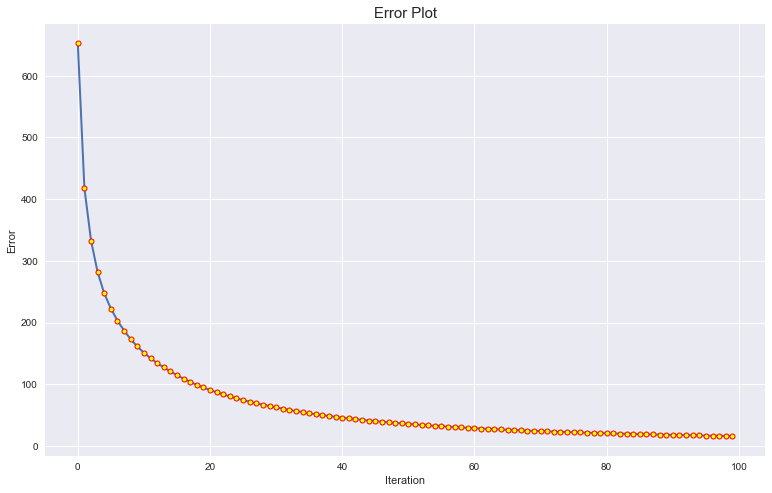

In [87]:
plot(errors)

# Test Predictions

In [145]:
testX1, testX2 = preprocess(test_path)
testX = np.concatenate((testX1, testX2), axis=1)

In [197]:
test_predictions = []

for i in range(testX.shape[0]):
    prediction = np.argmax(activation_func(testX[i].dot(weights_0_1), "RelU").dot(weights_1_2))
    test_predictions.append(prediction)

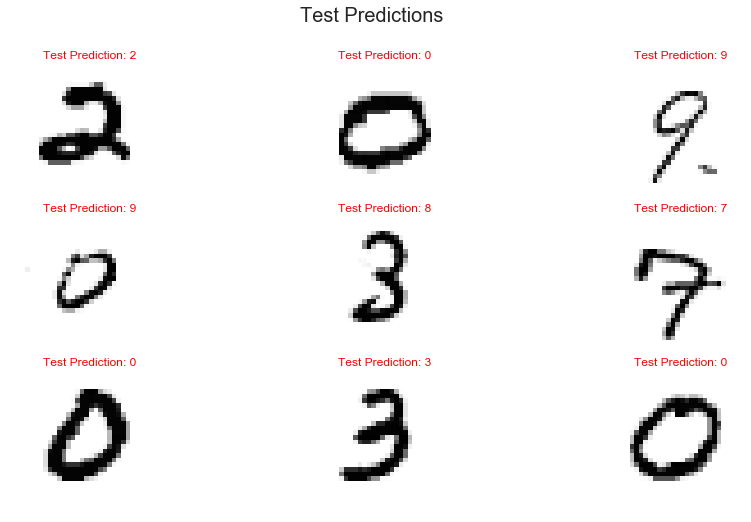

In [278]:
show_image(np.array([testX[0],testX[1],testX[2],testX[3],testX[4],testX[5],testX[6],testX[7],testX[8]]), test_predictions[:9])